<a href="https://colab.research.google.com/github/MohammadrezaTale/Digikala-sentiment-analysis/blob/master/Digikala_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Digikala comments sentiment analysis

## Step1) Loading Data from Google drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from tqdm import tqdm

In [ ]:
!gdown --id 17TXDYfMka__XHUrC30Khxn63614ZEN01

/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=17TXDYfMka__XHUrC30Khxn63614ZEN01
To: /content/Digikala.csv
100% 1.44M/1.44M [00:00<00:00, 33.4MB/s]


In [ ]:
df = pd.read_csv('Digikala.csv')


## Step2) Dataframe Preprocessing

In [ ]:
df.head()

,Text,Score,Suggestion
0,این اولین تجربه من برای خرید ایفون هست امروز...,100,1
1,خرید این محصول رو توصیه میکنم,84,1
2,1 ساله این گوشی رو دارم هیچ نقطه ضعفی ازش ند...,60,1
3,سلام خدمت دوستان این گوشی از همه نظر عالی کیف...,96,1
4,سلام دوستانی که نگران شکستن صفحه نمایش هستند ا...,92,1


In [ ]:
df.shape

(3261, 3)

In [ ]:
df.isnull().sum()

Text          0
Score         0
Suggestion    0
dtype: int64

In [ ]:
#drop suggestion column
df.drop('Suggestion',axis=1, inplace = True)

In [ ]:
df['Score'] = (df['Score']/10).astype('int')

In [ ]:
df.sort_values(by='Score',ascending= False).head()

,Text,Score
0,این اولین تجربه من برای خرید ایفون هست امروز...,10
2364,کیفیت عالی سریع آماده استفاده میشه همین ک می ...,10
2014,واقعا زیباست که البته سلیقه ها متفاوته قطعات ...,10
2013,دسته فوق العادس حتما بخرید بی شک بهترین دستش,10
866,لطفاًموجودش کنید,10


In [ ]:
df = df.loc[(df['Score']<6) | (df['Score']>7)]

In [ ]:
df['Score'].value_counts().sort_values()

1      22
3      54
0      55
2      64
4     149
5     155
9     443
10    492
8     752
Name: Score, dtype: int64

In [ ]:
df.loc[:,'label'] = df['Score'].apply(lambda Score:1 if Score>7 else 0)

In [ ]:
df['label'].value_counts().sort_values()

0     499
1    1687
Name: label, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2186 entries, 0 to 3260
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    2186 non-null   object
 1   Score   2186 non-null   int64 
 2   label   2186 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 68.3+ KB


<BarContainer object of 2 artists>

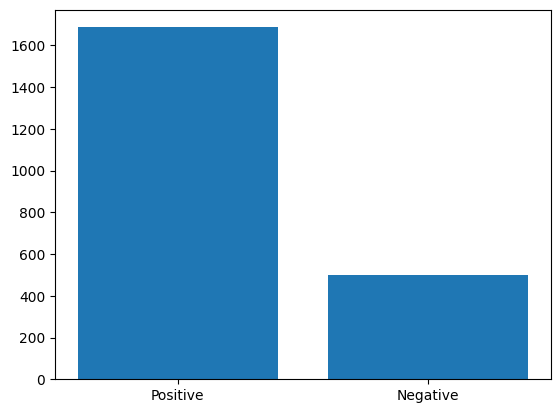

In [ ]:
plt.bar(['Positive','Negative'], df['label'].value_counts())

## Text Preprocessing

In [ ]:
df['Text'].iloc[20]

'سلام من تقریبا دو ماهی میشه که این گوشی رو خریدم و خدا رو شکر هیچ عیب قابل توجهی نداشته که بخواد اذیت کنه از لحاظ ظاهری خیلی پشت گوشی قشنگه و تو چشمه و همون اول که میبینیش خود نمایی میکنه توی قدرت همه جور بازی رو اجرا میکنه پس نگران قدرت و عملکردش نباشید من  خودم بازی های مختلفی رو روش اجرا کردم مثل Mortal kombat X که واقها بازی سنگینیه ولی بدون کوچکترین مشکلی اجراش کرد گوشی همون اول Android 7 با رابط کاربری EMUI 5 1 اما به Android 8 و رابط کاربری EMUI 8 اپدیت میشه تو اپدیت قابلیت Game suit هم اضافه شده که میتونید قدرت گوشی رو تو اجرای بازی کنترل کنید و اگه اون رو روی حالت Gaming mode بزارید بازی مثل asfalt 8 رو تو پس زمینه حتی بعد از چند ساعت باز نگه میداره و این خبر خوبیه برای گیمرا توی دوربین هم هواوی چیزی کم نزاشته و واقعا امکانات عالی داره تو شب و محیط های کم نور میتونید از حالت Night mode استفاده کنید  توی این حالت عکس ها بدون نویز ثبت میشه ولی نیاز به پایه دارید توی روز هم که خودتون میدونید عالیه خود رابط کاربری توی اپدیت جدید بحبود هایی رو داشته و گزینه تشخیص چهره  Face unlock

In [ ]:
corpus =df.copy()

In [ ]:
#hazm
!pip install hazm
from hazm import *

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
stemmer = Stemmer()
lemma = Lemmatizer()

In [ ]:
stopword = stopwords_list()
unwanted_num = {'هستند','عالی','نیستند','نبود','نمی شود', 'است', 'می شود', 'شد', 'شده', 'بود' ,'نیست', 'خوبی', 'خوب' ,'بهترین', 'بهتر', 'متاسفانه'} 
stopwords = [item for item in stopword if item not in unwanted_num]

In [ ]:
stopword

['و',
 'در',
 'به',
 'از',
 'که',
 'این',
 'را',
 'با',
 'است',
 'برای',
 'آن',
 'یک',
 'خود',
 'تا',
 'کرد',
 'بر',
 'هم',
 'نیز',
 'گفت',
 'می\u200cشود',
 'وی',
 'شد',
 'دارد',
 'ما',
 'اما',
 'یا',
 'شده',
 'باید',
 'هر',
 'آنها',
 'بود',
 'او',
 'دیگر',
 'دو',
 'مورد',
 'می\u200cکند',
 'شود',
 'کند',
 'وجود',
 'بین',
 'پیش',
 'شده_است',
 'پس',
 'نظر',
 'اگر',
 'همه',
 'یکی',
 'حال',
 'هستند',
 'من',
 'کنند',
 'نیست',
 'باشد',
 'چه',
 'بی',
 'می',
 'بخش',
 'می\u200cکنند',
 'همین',
 'افزود',
 'هایی',
 'دارند',
 'راه',
 'همچنین',
 'روی',
 'داد',
 'بیشتر',
 'بسیار',
 'سه',
 'داشت',
 'چند',
 'سوی',
 'تنها',
 'هیچ',
 'میان',
 'اینکه',
 'شدن',
 'بعد',
 'جدید',
 'ولی',
 'حتی',
 'کردن',
 'برخی',
 'کردند',
 'می\u200cدهد',
 'اول',
 'نه',
 'کرده_است',
 'نسبت',
 'بیش',
 'شما',
 'چنین',
 'طور',
 'افراد',
 'تمام',
 'درباره',
 'بار',
 'بسیاری',
 'می\u200cتواند',
 'کرده',
 'چون',
 'ندارد',
 'دوم',
 'بزرگ',
 'طی',
 'حدود',
 'همان',
 'بدون',
 'البته',
 'آنان',
 'می\u200cگوید',
 'دیگری',
 'خواهد_شد',


In [ ]:
len(stopwords_list())

389

In [ ]:
len(stopwords)

375

In [ ]:
def preprocess(review_text):
  review_text = re.sub('https\S+','',review_text)
  review_text = re.sub('[a-zA-z]','',review_text)
  review_text = re.sub(r'[!”#$%&’()*+,-/:;<=>?@[\]^_`{|}~0-9۱۲۳۴۵۶۷۸۹۰]','',review_text)
  review_text = re.sub(r'[\s]{2,}', ' ',review_text)
  review_text = re.sub(r'(\w)\1{2,}', r'\1',review_text)
  # review_text = sent_tokenize(review_text)
  review_text = word_tokenize(review_text)
  review_text = [item for item in review_text if item not in stopwords]
  review_text = [stemmer.stem(i) for i in review_text]
  review_text = [lemma.lemmatize(word=w, pos='v') for w in review_text]
  review_text = [i for i in review_text if len(i) > 1]
  review_text = ' '.join(review_text)
  if re.search(r'[\u0600-\u06FF]', review_text):
    return review_text
  else:
    return None

In [ ]:
tqdm.pandas()

In [ ]:
corpus['CleanText'] = df['Text'].progress_apply(preprocess)

100%|██████████| 2186/2186 [00:00<00:00, 2318.52it/s]


In [ ]:
corpus['CleanText'].iloc[20]
# df['Text'].iloc[30]

'سلا تقریبا ماه میشه گوش خرید خدا شکر عیب توجه نداشته بخواد اذ کنه ظاهر گوش قشنگه چشمه همون میبین نما میکنه تو قدر جور باز میکنه نگر قدر عملکرد نباشید خود باز مختلف واق باز سنگینیه کوچک مشکل اجرا گوش همون رابط کاربر رابط کاربر اپد میشه اپد قابل اضافه شده میتونید قدر گوش اجرا باز کنترل اگه اون حال بزارید باز زمینه ساع نگه میداره خبر خوبیه گیمرا تو دوربین هواو نزاشته واقعا امک عال داره شب محیط نور میتونید حال استفاده تو حال عکس نویز ثب میشه پایه دارید تو روز خودتون میدونید عالیه رابط کاربر تو اپد بحبود گزینه تشخیص چهره به اضافه شده تو باطر میشه بد عال خوبه تو ساع ده دقیقه شارژ میشه استفاده ترکیب گوش روز شارژ داره تو باز انلاین ساع باز باطر درصد تو ساع باز درصد شد تو چیز عالیه شک نکنید بخرید اگه دوربین اهم میدیید پیشنهاد هس درضمن گوش دیجیکالا خرید وتو بدس اگه میخواید گوش بخرید دیج کالا بخرید توپه ممنون گوش خواندید'

In [ ]:
corpus.head()

,Text,Score,label,CleanText
0,این اولین تجربه من برای خرید ایفون هست امروز...,10,1,تجربه خرید ایفون هس امروز دس رسیده اس طلا هس د...
1,خرید این محصول رو توصیه میکنم,8,1,خرید محصول توصیه میکن
3,سلام خدمت دوستان این گوشی از همه نظر عالی کیف...,9,1,سلا خدم دوس گوش عال کیف ساخ سرع کیف صدا تصویر ...
4,سلام دوستانی که نگران شکستن صفحه نمایش هستند ا...,9,1,سلا دوستان نگر شکستن صفحه نما هستند بدونند صفح...
6,اول از همه خوشحالم که بالاخره نسخه های 128 گیگ...,9,1,خوشحال بالاخره نسخه گیگابایت فرو قرار حافظه گو...


In [ ]:
corpus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2186 entries, 0 to 3260
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       2186 non-null   object
 1   Score      2186 non-null   int64 
 2   label      2186 non-null   int64 
 3   CleanText  2186 non-null   object
dtypes: int64(2), object(2)
memory usage: 85.4+ KB


In [ ]:
corpus.isnull().sum()

Text         0
Score        0
label        0
CleanText    0
dtype: int64

In [ ]:
corpus = corpus.dropna(axis=0)

In [ ]:
corpus.shape

(2186, 4)

In [ ]:
corpus.head(10)

,Text,Score,label,CleanText
0,این اولین تجربه من برای خرید ایفون هست امروز...,10,1,تجربه خرید ایفون هس امروز دس رسیده اس طلا هس د...
1,خرید این محصول رو توصیه میکنم,8,1,خرید محصول توصیه میکن
3,سلام خدمت دوستان این گوشی از همه نظر عالی کیف...,9,1,سلا خدم دوس گوش عال کیف ساخ سرع کیف صدا تصویر ...
4,سلام دوستانی که نگران شکستن صفحه نمایش هستند ا...,9,1,سلا دوستان نگر شکستن صفحه نما هستند بدونند صفح...
6,اول از همه خوشحالم که بالاخره نسخه های 128 گیگ...,9,1,خوشحال بالاخره نسخه گیگابایت فرو قرار حافظه گو...
7,من دو ماهه خریدم واقعا راضیم دوربینشم عالیه ...,10,1,ماهه خرید واقعا راض دوربین عالیه به گوش رنج قی...
8,بنظر من گوشی خوب و مقرون به صرفه ای بود توی ای...,10,1,بنظر گوش خوب مقرون صرفه بود تو دوسال داشتم جور...
9,از خریدم راضی ام و گوشی بینظیریه منتهی یه ایر...,9,1,خرید راض گوش بینظیریه منته یه ایراد داره برنام...
11,همه چیز این گوشی عالیه بجز قیمت که البته بیشتر...,9,1,گوش عالیه بجز قیم بخاطر گرون دلاره گوش گلکس دا...
12,من و خانواده ام گوشی های متفاوتی رو داشتیم چه ...,5,0,خانواده گوش متفاوت داشت سامسونگ مثلا آیفون مدل...


In [ ]:
corpus['CleanText'].iloc[3]

'سلا دوستان نگر شکستن صفحه نما هستند بدونند صفحه گوریلا گلس محافظ میشه خد سامسونگ شرایط صفحه گوش ایراد بشه هزار تو صفحه براتون تعویض میکنند امک گوش عالیه خرید خود راض'

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(min_df=2, max_features= 10000)
X_tfidf = tf.fit_transform(corpus['CleanText']).todense()

In [ ]:
labels = corpus['label'].values

In [ ]:
X_tfidf = np.squeeze(np.asarray(X_tfidf))

In [ ]:
#balancing
from imblearn.over_sampling import SMOTE

# X is your text data and y is the corresponding labels
smote = SMOTE()
X_res, y_res = smote.fit_resample(X_tfidf, labels)


In [ ]:
X_tfidf_train, X_tfidf_test, y_tfidf_train, y_tfidf_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [ ]:
# X_tfidf_train = np.squeeze(np.asarray(X_tfidf_train))
# X_tfidf_test = np.squeeze(np.asarray(X_tfidf_test))

In [ ]:
X_tfidf_train.shape, X_tfidf_test.shape, y_tfidf_train.shape, y_tfidf_test.shape

((2699, 3436), (675, 3436), (2699,), (675,))

# LogisticResgression

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# LR = LogisticRegression()
# grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
#         'penalty': ['l1', 'l2'],
#         'solver': ['lbfgs', 'liblinear']}

# # perform grid search cross-validation to find the best hyperparameters
# grid_search = GridSearchCV(estimator=LR, param_grid=grid, cv=5, n_jobs=-1, scoring='accuracy',verbose=4)
# grid_search.fit(X_tfidf_train, y_tfidf_train)

# # print the best hyperparameters and the corresponding mean cross-validation score
# print("Best Hyperparameters: ", grid_search.best_params_)
# print("Best Accuracy Score: ", grid_search.best_score_)

In [ ]:
#logisticregression
from sklearn.linear_model import LogisticRegression
from time import perf_counter
start_tra = perf_counter()

LR = LogisticRegression(C=10, penalty='l2', solver='lbfgs', random_state=42)
LR.fit(X_tfidf_train,y_tfidf_train)

end_tra = perf_counter()
print(f'train phase time: ', round((end_tra-start_tra), 1))

score = LR.score(X_tfidf_test, y_tfidf_test)
print("Accuracy:", score)
y_pred = LR.predict(X_tfidf_test)
print(classification_report(y_tfidf_test, y_pred))

train phase time:  2.8
Accuracy: 0.8918518518518519
              precision    recall  f1-score   support

           0       0.85      0.94      0.89       323
           1       0.94      0.85      0.89       352

    accuracy                           0.89       675
   macro avg       0.89      0.89      0.89       675
weighted avg       0.90      0.89      0.89       675



# Naive Bayes

In [ ]:
# params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0],
#           'fit_prior': [True, False],
#           'class_prior': [None, [0.1,]* 2, ],
#          }

# nb_grid = GridSearchCV(MultinomialNB(), param_grid=params, n_jobs=-1, cv=5, verbose=5)
# nb_grid.fit(X_tfidf_train,y_tfidf_train)

# print('Best Parameters : {}'.format(nb_grid.best_params_))
# print('Best Accuracy Through Grid Search : {:.3f}\n'.format(nb_grid.best_score_))

In [ ]:
start_tra = perf_counter()

NB = MultinomialNB(alpha=0.01, class_prior= None, fit_prior= True)
NB.fit(X_tfidf_train,y_tfidf_train)

end_tra = perf_counter()
print(f'train phase time: ', round((end_tra-start_tra), 1))


score = NB.score(X_tfidf_test, y_tfidf_test)
print("Accuracy:", score)
y_pred_NB = NB.predict(X_tfidf_test)
print(classification_report(y_tfidf_test, y_pred_NB))

train phase time:  0.1
Accuracy: 0.917037037037037
              precision    recall  f1-score   support

           0       0.90      0.93      0.91       323
           1       0.93      0.91      0.92       352

    accuracy                           0.92       675
   macro avg       0.92      0.92      0.92       675
weighted avg       0.92      0.92      0.92       675



# SVM

In [ ]:
# param_grid = {'C': [1, 100, 1000], 'kernel': ['rbf','linear']}
# svc = SVC()
# grid_search = GridSearchCV(svc, param_grid, cv=5, verbose=1)
# grid_search.fit(X_tfidf_train, y_tfidf_train)
# # print best parameter after tuning
# print(grid_search.best_params_)
  
# # print how our model looks after hyper-parameter tuning
# print(grid_search.best_estimator_)

In [ ]:
start_tra = perf_counter()

SVM = SVC(C=100, kernel='rbf')
SVM.fit(X_tfidf_train,y_tfidf_train)

end_tra = perf_counter()
print(f'train phase time: ', round((end_tra-start_tra), 1))

score = SVM.score(X_tfidf_test, y_tfidf_test)
print("Accuracy:", score)
y_pred_svm = SVM.predict(X_tfidf_test)
print(classification_report(y_tfidf_test, y_pred_svm))

train phase time:  23.7
Accuracy: 0.9303703703703704
              precision    recall  f1-score   support

           0       0.95      0.90      0.93       323
           1       0.91      0.96      0.93       352

    accuracy                           0.93       675
   macro avg       0.93      0.93      0.93       675
weighted avg       0.93      0.93      0.93       675



## Test Sentence

In [ ]:
# LogisticRegression
X_pred = tf.transform([preprocess('دوست داشتم')]).todense()
X_pred = np.asarray(X_pred)
y_new = LR.predict(X_pred)
if y_new[0] == 1:
  print('Positive')
else:
  print('Negative')

Negative


In [ ]:
# SVM
X_pred = tf.transform([preprocess('دوست نداشتم')]).todense()
X_pred = np.asarray(X_pred)
y_new = SVM.predict(X_pred)
if y_new[0] == 1:
  print('Positive')
else:
  print('Negative')

Positive


In [ ]:
# Naive Bayes
X_pred = tf.transform([preprocess('دوست داشتم')]).todense()
X_pred = np.asarray(X_pred)
y_new = NB.predict(X_pred)
if y_new[0] == 1:
  print('Positive')
else:
  print('Negative')

Negative
